# Task 1 - Iris Flowers Classification ML Project :

 - This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.
 
 
 Algorithm Applied - 
 1. LogisticRegression
 2. LinearDiscriminantAnalysis
 3. KNeighborsClassifier
 4. DecisionTreeClassifier
 5. GaussianNB
 6. SVM (Support Vector Machine)

#### Dataset :- http://archive.ics.uci.edu/ml/datasets/Iris 

### Importing Python Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold


In [2]:
!pip install scikit-plot

In [3]:
import scikitplot as skplt

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv(url, names=names)

In [5]:
iris

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
iris.isnull().sum() # returns the total null value in dataset of each column

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [7]:
iris.describe()  # used to view some basic statistical details like mean,median,std, percentile

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.columns  # to show the name of columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'], dtype='object')

In [9]:
iris.nunique()  # returns the no. of unique elements in objects

sepal-length    35
sepal-width     23
petal-length    43
petal-width     22
class            3
dtype: int64

In [10]:
iris.max()

sepal-length               7.9
sepal-width                4.4
petal-length               6.9
petal-width                2.5
class           Iris-virginica
dtype: object

In [11]:
iris.min()

sepal-length            4.3
sepal-width             2.0
petal-length            1.0
petal-width             0.1
class           Iris-setosa
dtype: object

## Visualization

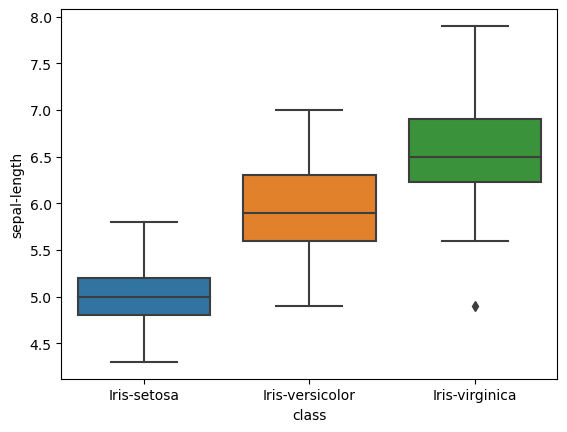

In [12]:
sns.boxplot(x="class", y ="sepal-length", data = iris )
plt.show()

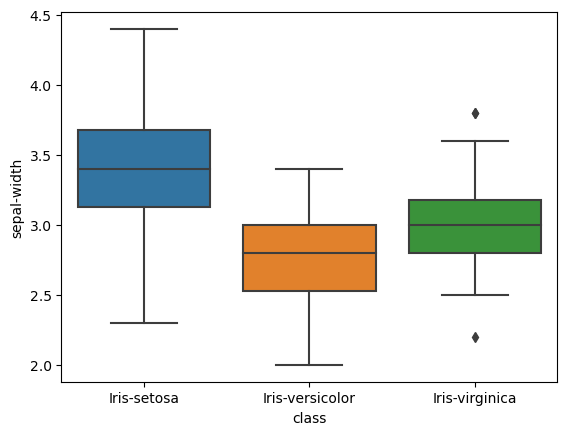

In [13]:
sns.boxplot(x="class", y ="sepal-width", data = iris )
plt.show()

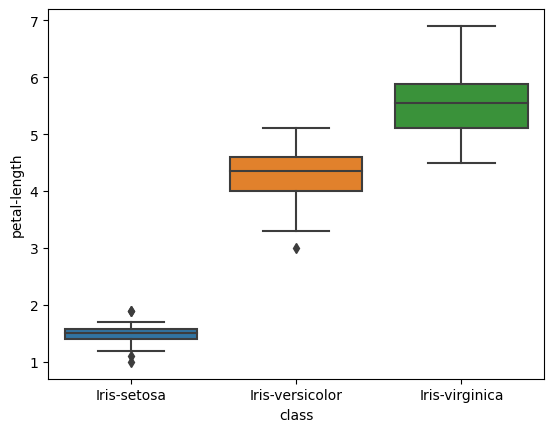

In [14]:
sns.boxplot(x="class", y ="petal-length", data = iris )
plt.show()

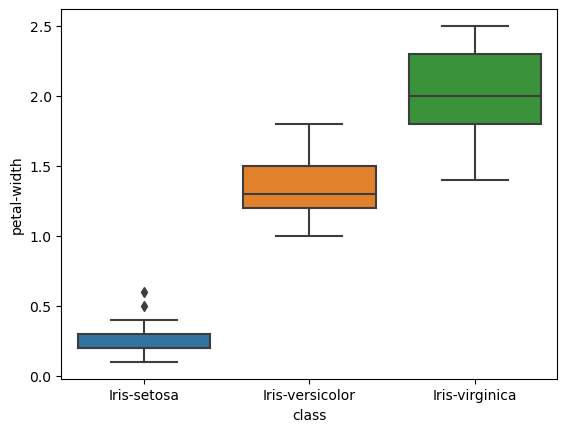

In [15]:
sns.boxplot(x="class", y ="petal-width", data = iris )
plt.show()

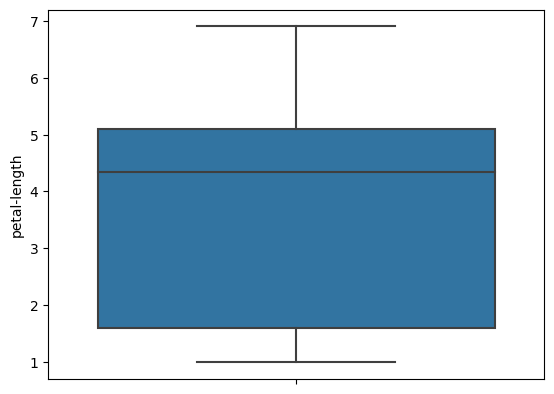

In [16]:
sns.boxplot(y ="petal-length", data = iris )
plt.show()

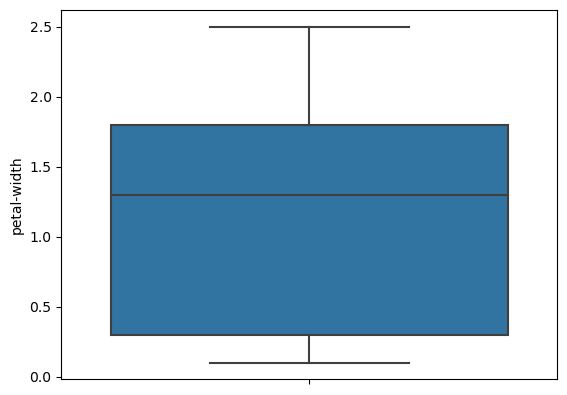

In [17]:
sns.boxplot(y ="petal-width", data = iris )
plt.show()

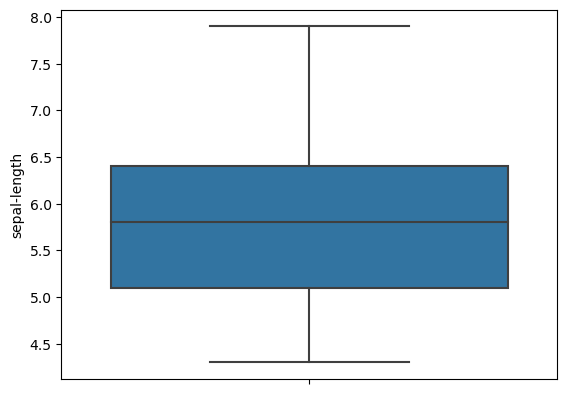

In [18]:
sns.boxplot(y ="sepal-length", data = iris )
plt.show()

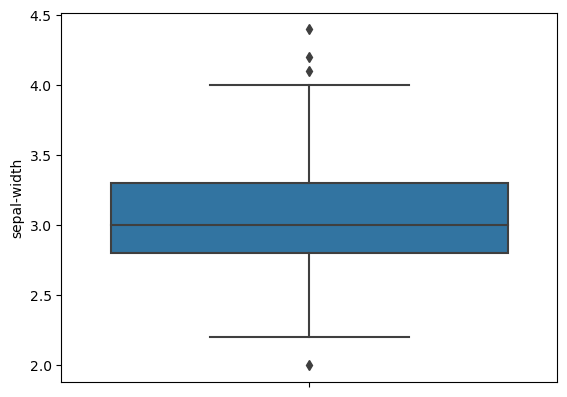

In [19]:
sns.boxplot(y ="sepal-width", data = iris )
plt.show()

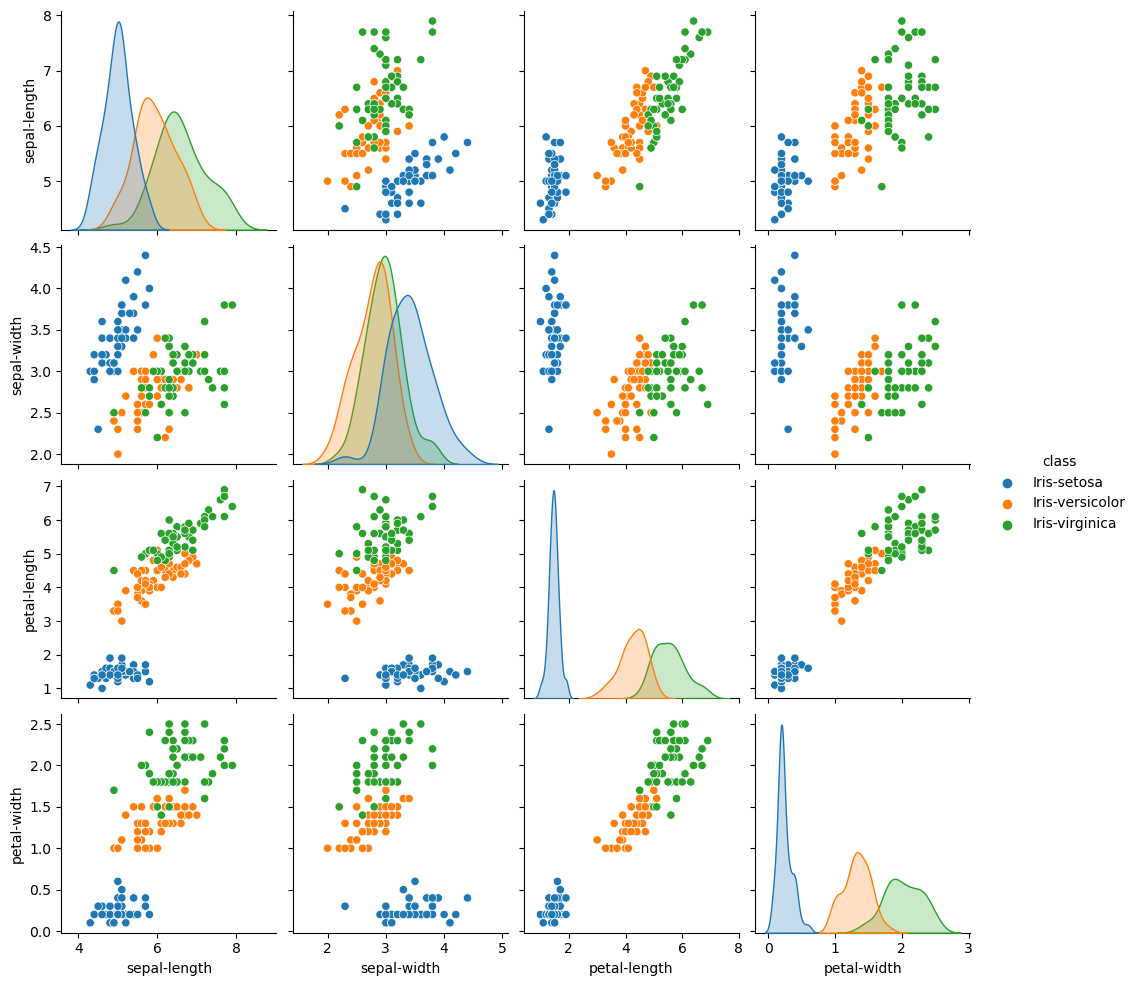

In [20]:
sns.pairplot(iris, hue = "class") # pairplot is use to check the relation b/w dataset

## Data preprocessing or Correlation matrix

In [21]:
# split validation dataset
array = iris.values
X = array[:, 0:4]
Y = array[:, 4]
val_size = 0.2
seed = 7
Xtrain, Xval, Ytrain, Yval = model_selection.train_test_split(X, Y, test_size = val_size, random_state = seed)

In [22]:
seed = 7
scoring = 'accuracy'

In [23]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits = 10, random_state = seed, shuffle=True)    
    cv_results = model_selection.cross_val_score(model, Xtrain, Ytrain, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.950000 (0.076376)
NB: 0.966667 (0.040825)
SVM: 0.983333 (0.033333)


C:\Users\91797\anaconda3\anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91797\anaconda3\anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

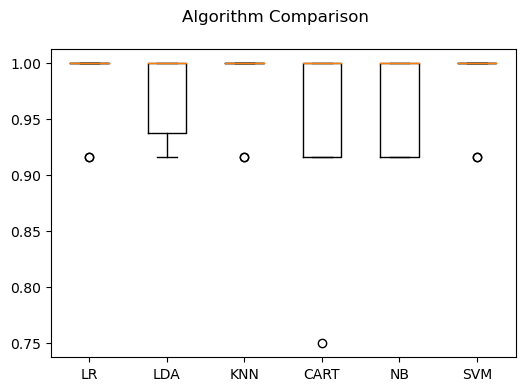

In [24]:
fig = plt.figure(figsize = (6,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [25]:
# make predictions
svm = SVC()
svm.fit(Xtrain, Ytrain)
predictions = svm.predict(Xval)
print("Accuracy:", accuracy_score(Yval, predictions))
print(confusion_matrix(Yval, predictions))
print(classification_report(Yval, predictions))

Accuracy: 0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30

